In [14]:
import numpy as np
import pprint
import math
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
################################
######## Cifrado César #########
################################

In [16]:
######## Funciones genéricas

def GenerarAlfabeto():
    arrAlfabeto=np.array(['A','B','C','D','E','F','G','H','I','J' \
                         ,'K','L','M','N','Ñ','O','P','Q','R','S' \
                         ,'T','U','V','W','X','Y','Z',',','.',' ' ])
    """
    arrAlfabeto=np.array(['A','B','C','D','E','F','G','H','I','J' \
                         ,'K','L','M','N','O','P','Q','R','S' \
                         ,'T','U','V','W','X','Y','Z'])
    """
    
    
    return arrAlfabeto

def MapArrCharArrNum(arrChar, arrAlfabeto):
    
    arrNum=np.zeros(0)
    
    for strChar in arrChar:
        nbrIndice=np.where(arrAlfabeto==strChar)[0][0]
        arrNum=np.append(arrNum, nbrIndice)
        
    arrNum=arrNum.astype(int)
    
    return arrNum

def MapArrNumArrChar(arrNum, arrAlfabeto):
    
    arrChar=np.zeros(0)
    for nbrNum in arrNum:
        strLetra=arrAlfabeto[nbrNum]
        arrChar=np.append(arrChar, strLetra)
    
    return arrChar

def ConvertirArrEnTexto(arrChar):
    
    strResultado=''
    for strChar in arrChar:
        strResultado=strResultado+strChar
    
    return strResultado

def GenerarDictFrecuencias(arrAlfabeto,strTexto):
    
    dictResultado={}
    arrTexto=np.array(list(strTexto))
    
    #Creamos el diccionario base
    for strLetra in arrAlfabeto:
        #print(strLetra)
        dictResultado[strLetra]=0
        
    #Barremos el diccionario de frecuencias para actualizar las letras que corresopndan
    unique, counts = np.unique(arrTexto, return_counts=True)
    
    #for item in unique:
        #print('item: ', item, ' ord(item): ', ord(item))
    
    dictFreqTexto=dict(zip(unique, counts))
    
    for key, value in dictFreqTexto.items():
        #if ord(key) == 8203:
        #    print('key: ', key)
        #    key=' '
        dictResultado[key]=value
    
    return dictResultado

In [22]:
######## Funciones cifrado César

def AplicarCifradoCesar(strTextoClaro, nbrLlave, arrAlfabeto):
    
    arrChar=np.array(list(strTextoClaro))
    arrNum=MapArrCharArrNum(arrChar,arrAlfabeto)
    #print('arrNum: ', arrNum, '\n')
    nbrLongAlfab=arrAlfabeto.shape[0]
    arrNum=(arrNum+nbrLlave)
    #print('arrNum+nbrLlave: ', arrNum, '\n')
    arrNum=arrNum%nbrLongAlfab
    #print('arrNum%nbrLongAlfab: ', arrNum, '\n')
    
    arrResultado=MapArrNumArrChar(arrNum,arrAlfabeto)
    strTextoCifrado=ConvertirArrEnTexto(arrResultado)
    
    return strTextoCifrado

def AplicarDescifradoCesar(strTextoCifr, nbrLlave, arrAlfabeto):
    
    arrChar=np.array(list(strTextoCifr))
    arrNum=MapArrCharArrNum(arrChar,arrAlfabeto)
    #print('arrNum: ', arrNum, '\n')
    nbrLongAlfab=arrAlfabeto.shape[0]
    arrNum=(arrNum-nbrLlave)
    #print('arrNum+nbrLlave: ', arrNum, '\n')
    arrNum=arrNum%nbrLongAlfab
    #print('arrNum%nbrLongAlfab: ', arrNum, '\n')
    
    arrResultado=MapArrNumArrChar(arrNum,arrAlfabeto)
    strTextoDescifrado=ConvertirArrEnTexto(arrResultado)
    
    return strTextoDescifrado

In [23]:
#Generación del alfabeto base
arrAlfabeto=GenerarAlfabeto()
pprint.pprint(arrAlfabeto)
#print()

#Desface acordado entre las 2 partes
strTextoClaro='VAMOS POR UNA CERVEZA.'
print('strTextoClaro: ', strTextoClaro, '\n')

nbrLlaveSecretaCesar=3
print('nbrLlaveSecretaCesar: ', nbrLlaveSecretaCesar, '\n')

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
       'Z', ',', '.', ' '], dtype='<U1')

strTextoClaro:  VAMOS POR UNA CERVEZA. 

nbrLlaveSecretaCesar:  3 



In [24]:
#Proceso de cifrado
strTextoCifradoCesar=AplicarCifradoCesar(strTextoClaro, nbrLlaveSecretaCesar, arrAlfabeto)
print('strTextoCifradoCesar: ', strTextoCifradoCesar, '\n')

arrNum:  [22  0 12 15 19 29 16 15 18 29 21 13  0 29  2  4 18 22  4 26  0 28] 

arrNum+nbrLlave:  [25  3 15 18 22 32 19 18 21 32 24 16  3 32  5  7 21 25  7 29  3 31] 

arrNum%nbrLongAlfab:  [25  3 15 18 22  2 19 18 21  2 24 16  3  2  5  7 21 25  7 29  3  1] 

strTextoCifradoCesar:  YDORVCSRUCXPDCFHUYH DB 



In [25]:
#Proceso de descifrado
strTextoDescifrado=AplicarDescifradoCesar(strTextoCifradoCesar, nbrLlaveSecretaCesar, arrAlfabeto)
print('strTextoDescifrado: ', strTextoDescifrado, '\n')

arrNum:  [25  3 15 18 22  2 19 18 21  2 24 16  3  2  5  7 21 25  7 29  3  1] 

arrNum+nbrLlave:  [22  0 12 15 19 -1 16 15 18 -1 21 13  0 -1  2  4 18 22  4 26  0 -2] 

arrNum%nbrLongAlfab:  [22  0 12 15 19 29 16 15 18 29 21 13  0 29  2  4 18 22  4 26  0 28] 

strTextoDescifrado:  VAMOS POR UNA CERVEZA. 



In [48]:
################################
######## Cifrado Hill ##########
################################

In [55]:
######## Funciones cifrado Hill
def CrearMatrizCifrar(strLlaveSecreta, nbrOrdenMtrx):
    
    arrLlaveTexto=np.array(list(strLlaveSecreta))
    #print('arrLlaveTexto: ', arrLlaveTexto, '\n')

    arrLlaveNum=np.zeros(0)
    arrLlaveNum=MapArrCharArrNum(arrLlaveTexto, arrAlfabeto)
    #print('arrLlaveNum: ', arrLlaveNum, '\n')

    mtrxLlave=arrLlaveNum.reshape(int(nbrOrdenMtrx), int(nbrOrdenMtrx))
    #print('mtrxLlave: \n', mtrxLlave, '\n')

    return mtrxLlave

def CrearMatrizDescifrar(strLlaveSecreta, nbrOrdenMtrx, nbrTamanioAlfabeto):
    
    mtrxCifrar=CrearMatrizCifrar(strLlaveSecreta, nbrOrdenMtrx)
    
    nbrDeterm=int(np.linalg.det(mtrxCifrar))
    #print('nbrDeterm: ', nbrDeterm, '\n')

    nbrDetermMod=nbrDeterm%nbrTamanioAlfabeto
    #print('nbrDetermMod: ', nbrDetermMod, '\n')

    for i in range(1,nbrTamanioAlfabeto):
        if (nbrDetermMod*i)%nbrTamanioAlfabeto == 1:
            nbrMultInv = i
            break

    #print('nbrMultInv: ', nbrMultInv, '\n')

    mtrxAdj=np.linalg.inv(mtrxCifrar.T).T * np.linalg.det(mtrxCifrar.T)
    #print('mtrxAdj: \n', mtrxAdj, '\n')

    mtrxAdjMod=mtrxAdj%nbrTamanioAlfabeto
    #print('mtrxAdjMod: \n', mtrxAdjMod, '\n')

    mtrxInv=nbrMultInv*mtrxAdjMod
    #print('mtrxInv: \n', mtrxInv, '\n')

    mtrxInvMod=(nbrMultInv*mtrxAdjMod)%nbrTamanioAlfabeto
    #print('mtrxInvMod: \n', mtrxInvMod, '\n')

    return mtrxInvMod

def AjustarTextoHill(strTexto, nbrOrdenMtrx):
    
    while ((len(strTexto)%nbrOrdenMtrx) != 0):
        strTexto=strTexto+' '
    #print('strTexto: ', strTexto, '\n')
    
    return strTexto

def ConvertirTextoEnMatrizHill(strTexto, nbrRaizLongLLave, arrAlfabeto):
    
    arrTexto=np.array(list(strTexto))
    arrNum=np.zeros(0)
    arrNum=MapArrCharArrNum(arrTexto, arrAlfabeto)
    #print('arrNum:\n', arrNum, '\n')

    mtrxNum=arrNum.reshape(int(len(strTexto)/nbrRaizLongLLave), int(nbrRaizLongLLave))
    #print('mtrxNum.reshape():\n', mtrxNum, '\n')
    mtrxNum=mtrxNum.T
    #print('mtrxNum.T:\n', mtrxNum, '\n')
    
    #mtrxNum=arrNum.reshape(int(nbrRaizLongLLave), int(len(strTexto)/nbrRaizLongLLave))
    #print('mtrxNum.reshape():\n', mtrxNum, '\n')
    
    return mtrxNum

def ConvertirMatrizHillEnTexto(mtrxHill, arrAlfabeto):
    
    mtrxHill=mtrxHill.T
    #print('mtrxHill.T:\n', mtrxHill, '\n')
    
    arrHill=mtrxHill.reshape(mtrxHill.shape[0]*mtrxHill.shape[1])
    #print('arrHill.reshape:\n', arrHill, '\n')
    
    #arrHill=mtrxHill.reshape(mtrxHill.shape[1]*mtrxHill.shape[0])
    #print('arrHill.reshape:\n', arrHill, '\n')
    
    arrTexto=MapArrNumArrChar(arrHill, arrAlfabeto)
    
    strTexto=ConvertirArrEnTexto(arrTexto)

    return strTexto

def AplicarMultipHill(mtrxLlave, mtrxTexto, nbrTamanioAlfabeto):
    
    mtrxRsltParcial=mtrxLlave@mtrxTexto
    #print('mtrxRsltParcial (mtrxLlave@mtrxTexto):\n', mtrxRsltParcial, '\n')
    mtrxRsltParcial=np.around(mtrxRsltParcial)
    mtrxRsltParcial=mtrxRsltParcial.astype(int)

    mtrxRsltFinal=mtrxRsltParcial%nbrTamanioAlfabeto
    #print('nbrTamanioAlfabeto: ',nbrTamanioAlfabeto, '\n')
    #print('mtrxRsltFinal (mtrxRsltParcial%nbrTamanioAlfabeto):\n', mtrxRsltFinal, '\n')

    return mtrxRsltFinal

def AplicarCifradoHill(strTextoClaro, strLlaveSecreta, arrAlfabeto):
    
    nbrLongitudLlave=len(strLlaveSecreta)
    nbrOrdenMtrx=math.sqrt(nbrLongitudLlave)
    
    mtrxCifrar=CrearMatrizCifrar(strLlaveSecreta, nbrOrdenMtrx)
    strTextoClaro=AjustarTextoHill(strTextoClaro, nbrOrdenMtrx)
    
    mtrxHillClara=ConvertirTextoEnMatrizHill(strTextoClaro, nbrOrdenMtrx, arrAlfabeto)
    mtrxHillCifrada=AplicarMultipHill(mtrxCifrar, mtrxHillClara, arrAlfabeto.shape[0])
    
    strTextoCifrado=ConvertirMatrizHillEnTexto(mtrxHillCifrada, arrAlfabeto)
    
    return strTextoCifrado

def AplicarDescifradoHill(strTextoCifrado, strLlaveSecreta, arrAlfabeto):
    
    nbrLongitudLlave=len(strLlaveSecreta)
    nbrOrdenMtrx=math.sqrt(nbrLongitudLlave)
    
    mtrxDescifrar=CrearMatrizDescifrar(strLlaveSecreta, nbrOrdenMtrx, arrAlfabeto.shape[0])
    #strTextoClaro=AjustarTextoHill(strTextoClaro, nbrOrdenMtrx)
    
    mtrxHillCifrada=ConvertirTextoEnMatrizHill(strTextoCifrado, nbrOrdenMtrx, arrAlfabeto)
    mtrxHillClara=AplicarMultipHill(mtrxDescifrar, mtrxHillCifrada, arrAlfabeto.shape[0])
    
    strTextoDescifrado=ConvertirMatrizHillEnTexto(mtrxHillClara, arrAlfabeto)
    
    return strTextoDescifrado

In [56]:
arrAlfabeto=GenerarAlfabeto()
pprint.pprint(arrAlfabeto)
print()

strLlaveSecretaHill='HILL'
print('strLlaveSecretaHill: ', strLlaveSecretaHill, '\n')

print('strTextoClaro: ', strTextoClaro, '\n')

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
       'Z', ',', '.', ' '], dtype='<U1')

strLlaveSecretaHill:  HILL 

strTextoClaro:  VAMOS POR UNA CERVEZA. 



In [57]:
#Proceso de cifrado
strTextoCifradoHill=AplicarCifradoHill(strTextoClaro, strLlaveSecretaHill, arrAlfabeto)
print('strTextoCifradoHill: ', strTextoCifradoHill, '\n')

arrNum:
 [22  0 12 15 19 29 16 15 18 29 21 13  0 29  2  4 18 22  4 26  0 28] 

mtrxNum.reshape():
 [[22  0]
 [12 15]
 [19 29]
 [16 15]
 [18 29]
 [21 13]
 [ 0 29]
 [ 2  4]
 [18 22]
 [ 4 26]
 [ 0 28]] 

mtrxNum.T:
 [[22 12 19 16 18 21  0  2 18  4  0]
 [ 0 15 29 15 29 13 29  4 22 26 28]] 

mtrxRsltParcial (mtrxLlave@mtrxTexto):
 [[154 204 365 232 358 251 232  46 302 236 224]
 [242 297 528 341 517 374 319  66 440 330 308]] 

nbrTamanioAlfabeto:  30 

mtrxRsltFinal (mtrxRsltParcial%nbrTamanioAlfabeto):
 [[ 4 24  5 22 28 11 22 16  2 26 14]
 [ 2 27 18 11  7 14 19  6 20  0  8]] 

mtrxHill.T:
 [[ 4  2]
 [24 27]
 [ 5 18]
 [22 11]
 [28  7]
 [11 14]
 [22 19]
 [16  6]
 [ 2 20]
 [26  0]
 [14  8]] 

arrHill.reshape:
 [ 4  2 24 27  5 18 22 11 28  7 11 14 22 19 16  6  2 20 26  0 14  8] 

strTextoCifradoHill:  ECX,FRVL.HLÑVSPGCTZAÑI 



In [58]:
#Proceso de descifrado
strTextoDescifrado=AplicarDescifradoHill(strTextoCifradoHill, strLlaveSecretaHill, arrAlfabeto)
print('strTextoDescifrado: ', strTextoDescifrado, '\n')

nbrDeterm:  -11 

nbrDetermMod:  19 

nbrMultInv:  19 

mtrxAdj: 
 [[ 11.  -8.]
 [-11.   7.]] 

mtrxAdjMod: 
 [[11. 22.]
 [19.  7.]] 

mtrxInv: 
 [[209. 418.]
 [361. 133.]] 

mtrxInvMod: 
 [[29. 28.]
 [ 1. 13.]] 

arrNum:
 [ 4  2 24 27  5 18 22 11 28  7 11 14 22 19 16  6  2 20 26  0 14  8] 

mtrxNum.reshape():
 [[ 4  2]
 [24 27]
 [ 5 18]
 [22 11]
 [28  7]
 [11 14]
 [22 19]
 [16  6]
 [ 2 20]
 [26  0]
 [14  8]] 

mtrxNum.T:
 [[ 4 24  5 22 28 11 22 16  2 26 14]
 [ 2 27 18 11  7 14 19  6 20  0  8]] 

mtrxRsltParcial (mtrxLlave@mtrxTexto):
 [[ 172. 1452.  649.  946. 1008.  711. 1170.  632.  618.  754.  630.]
 [  30.  375.  239.  165.  119.  193.  269.   94.  262.   26.  118.]] 

nbrTamanioAlfabeto:  30 

mtrxRsltFinal (mtrxRsltParcial%nbrTamanioAlfabeto):
 [[22 12 19 16 18 21  0  2 18  4  0]
 [ 0 15 29 15 29 13 29  4 22 26 28]] 

mtrxHill.T:
 [[22  0]
 [12 15]
 [19 29]
 [16 15]
 [18 29]
 [21 13]
 [ 0 29]
 [ 2  4]
 [18 22]
 [ 4 26]
 [ 0 28]] 

arrHill.reshape:
 [22  0 12 15 19 29 16 15 18 29

In [59]:
#######################################
######## Análisis de cifrados #########
#######################################

In [60]:
print('len(strTextoClaro):   ', len(strTextoClaro))
print('strTextoClaro:        ', strTextoClaro)
print('strTextoCifradoCesar: ', strTextoCifradoCesar)
print('strTextoCifradoHill:  ', strTextoCifradoHill)

len(strTextoClaro):    22
strTextoClaro:         VAMOS POR UNA CERVEZA.
strTextoCifradoCesar:  YDORVCSRUCXPDCFHUYH DB
strTextoCifradoHill:   ECX,FRVL.HLÑVSPGCTZAÑI


In [15]:

dictFrecuenciasClaro=GenerarDictFrecuencias(arrAlfabeto, strTextoClaro)
dictFrecuenciasCesar=GenerarDictFrecuencias(arrAlfabeto, strTextoCifradoCesar)
dictFrecuenciasHill=GenerarDictFrecuencias(arrAlfabeto, strTextoCifradoHill)

df = pd.DataFrame({
    'OcurrenciasClaro': np.array(list(dictFrecuenciasClaro.values())),
    'OcurrenciasCifradoCesar': np.array(list(dictFrecuenciasCesar.values())),
    'OcurrenciasCifradoHill': np.array(list(dictFrecuenciasHill.values()))
     }, index= dictFrecuenciasClaro.keys())

print(df)

   OcurrenciasClaro  OcurrenciasCifradoCesar  OcurrenciasCifradoHill
A                 3                        0                       1
B                 0                        1                       0
C                 1                        3                       2
D                 0                        3                       0
E                 2                        0                       1
F                 0                        1                       1
G                 0                        0                       1
H                 0                        2                       1
I                 0                        0                       1
J                 0                        0                       0
K                 0                        0                       0
L                 0                        0                       2
M                 1                        0                       0
N                 1               

<BarContainer object of 30 artists>

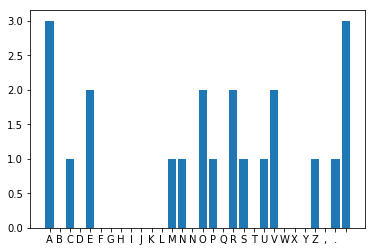

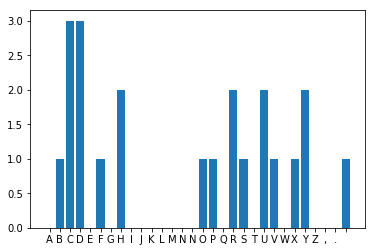

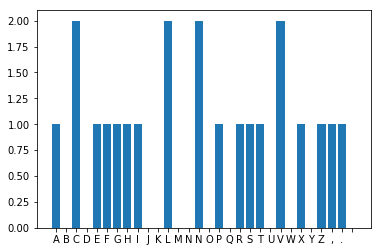

In [16]:
#Texto en claro
data = dictFrecuenciasClaro
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

#Texto con cifrado Cesar
data = dictFrecuenciasCesar
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

#Texto con cifrado Hill
data = dictFrecuenciasHill
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

In [17]:
f = open("HistoriaMex4.txt", "r")
strTextoFuente='';
for x in f:
    strTextoFuente=strTextoFuente+x
f.close()


In [18]:
strTextoFuente=strTextoFuente.replace(chr(8203) ,chr(32))
#Proceso de cifrado César
strTextoCifradoCesar2=AplicarCifradoCesar(strTextoFuente, nbrLlaveSecretaCesar, arrAlfabeto)
#Proceso de cifrado Hill
strTextoCifradoHill2=AplicarCifradoHill(strTextoFuente, strLlaveSecretaHill, arrAlfabeto)

dictFrecuenciasClaro=GenerarDictFrecuencias(arrAlfabeto, strTextoFuente)
dictFrecuenciasHill=GenerarDictFrecuencias(arrAlfabeto, strTextoCifradoHill2)
dictFrecuenciasCesar=GenerarDictFrecuencias(arrAlfabeto, strTextoCifradoCesar2)

df = pd.DataFrame({
    'OcurrenciasClaro': np.array(list(dictFrecuenciasClaro.values())),
    'OcurrenciasCifradoCésar': np.array(list(dictFrecuenciasCesar.values())),
    'OcurrenciasCifradoHill': np.array(list(dictFrecuenciasHill.values()))
     }, index= dictFrecuenciasClaro.keys())

print(df)

   OcurrenciasClaro  OcurrenciasCifradoCésar  OcurrenciasCifradoHill
A              1600                      156                     248
B               162                      148                     650
C               776                     2603                     460
D               622                     1600                     734
E              1730                      162                     282
F                76                      776                     392
G               126                      622                     411
H               102                     1730                     663
I              1019                       76                     605
J                23                      126                     469
K                 8                      102                     431
L               825                     1019                     444
M               441                       23                     616
N               904               

<BarContainer object of 30 artists>

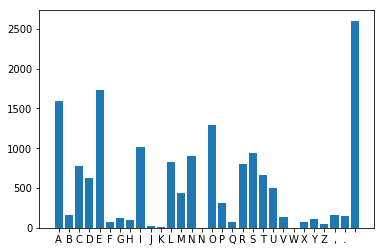

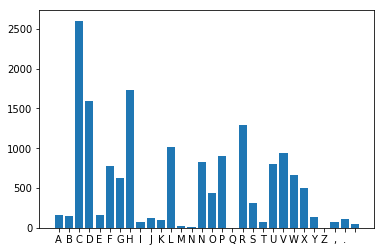

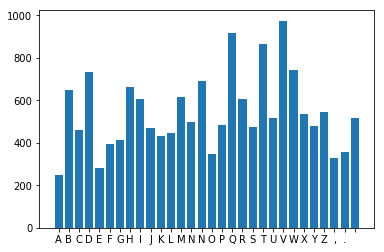

In [19]:
#Texto en claro
data = dictFrecuenciasClaro
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

#Texto César
data = dictFrecuenciasCesar
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

#Texto Hill
data = dictFrecuenciasHill
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)